## Classification Loss Functions

The difference between classification and regression when training neural networks is that for classification we need to predict binary vectors that indicate whether an object belongs to a given category or not. If an object belongs to category $k$ the $k-th$ component of the target vector will be one, otherwise it will be zero. Other than in regression tasks where vector components can have all real values in classification tasks the range of values is limited to the range between zero and one. This is why we need other loss functions in classification than in regression.

Let's think what attributes a loss function for classification tasks must have. There are basically two extreme scenarios when we try to predict a class for an object:

**First scenario**: The prediction is correct, which means the true label and the predicted label are either both zero or both one. In that case the difference between the true and predicted label is zero. The loss function should output zero for that scenario.

**Second scenario**: The prediction is wrong, which means the true label is one and the prediced label is zero or vice versa. That means the difference between the predicted label and the true label is one, which is the maximum difference we can get in classification tasks. The loss function should output a large value for that scenario.

We need a loss function $l(x)$ with the following attributes:
- $f(0) = 0$
- $f(1) = \text{very large}$

One function that has these attributes is the logarithm. Let's explore the lorarithm function:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

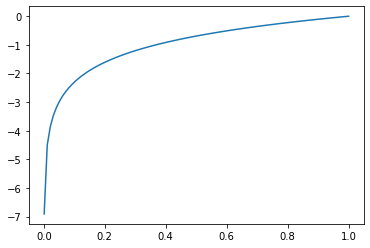

In [2]:
x = np.linspace(0.001, 1, 100)
y = np.log(x)

plt.plot(x, y)

But wait, that is not what we needed. The logarithm behaves exactly like the opposite of our wanted function. It has large (negative) values near zero and is zero at $x=1". We need to modify this function to match the criteria of our desired loss function.

First we need to get rid of the negative values. We can do this by multiplying the logarithm with $-1$. Then the loss function looks like this:

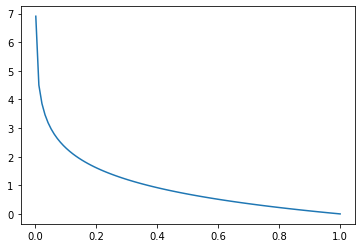

In [3]:
x = np.linspace(0.001, 1, 100)
y = - np.log(x)

plt.plot(x, y)

That looks better. But we still need to flip the function, so that it becomes zero for $x=0$ and large for $x=1$. We can do this by computing the differenence between 1 and the function's input and then run this difference through the logarithm function.

C:\Users\tilof\AppData\Local\Temp\ipykernel_13868\1244499173.py:2: RuntimeWarning: divide by zero encountered in log
  y = - np.log(1 - x)


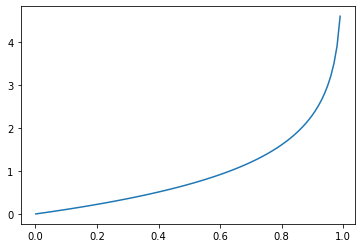

In [4]:
x = np.linspace(0.001, 1, 100)
y = - np.log(1 - x)

plt.plot(x, y)

There is still a little problem: The logarithm function is not defined for $x=0$. If we try to compute `np.exp(0)` we will get `-inf` which means that the function is infinitely negative at that point. When training models with a logarithmic loss function we have to do a little trick. If the input of the logarithm is zero we add a very small number to it (i.e. 0.000000001) so that we get rid of `-inf`. The number added to zero should be very small so that our results do not get distorted too much.

## Binary Cross Entropy Loss

Let's have a look at the simplest categorical loss function - the Binary Cross Entropy Loss Function. First this loss function distinguishes two scenarios: True positive and true negative values. If the true target variable is one then the loss is calculated in the following way:

$$
L_{pos} = - \log(\hat{y})
$$

If the true target variable is zero then the loss is calculated in the following way:

$$
L_{neg} = - \log(1 - \hat{y})
$$

So the loss function could be written in the following way:

```python
if label == 0:
    loss = - np.log(prediction)
else:
    loss = - np.log(1 - prediction)
```

But we can also get rid of the if-else block by introducing two new binary variabes:

$$I_{pos} = y$$
$$I_{neg} = (1-y)$$

$I_{pos}$ and $I_{neg}$ indicate whether the true labe is positive or negative. If the true label is positive then $I_{pos}$ becomes one and $I_{neg}$ becomes zero. If the true label is negative $I_{pos}$ becomes zero and $I_{neg}$ becomes one. That's the pwer of binary math - we can just flip values from true to false by subtracting them from one.

Now we can compute our loss with a single mathematical term without an if-else-block:

$$
L_{object} = I_{pos} \cdot L_{pos} + I_{neg} \cdot L_{neg} = y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y})
$$

The final thing we have to do is to sum over all losses of all $n$ objects and then computing the average of all losses by multiplying the sum of all losses with $\frac{1}{n}$

$$
L_{BCE} = -\frac{1}{n} \sum\limits_{i=1}^n y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i)
$$

C:\Users\tilof\AppData\Local\Temp\ipykernel_13868\496100546.py:5: RuntimeWarning: divide by zero encountered in log
  loss_neg = - np.log(1 - x)


Text(0.5, 1.0, 'Loss function for true negative objects')

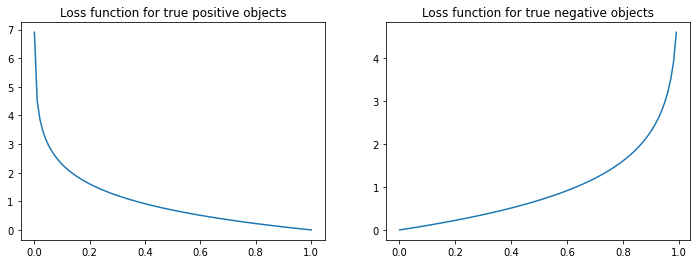

In [5]:
# Let's plot the loss function for true positive and true negative objects
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
x = np.linspace(0.001, 1, 100)
loss_pos = - np.log(x)
loss_neg = - np.log(1 - x)
ax[0].plot(x, loss_pos)
ax[0].set_title("Loss function for true positive objects")
ax[1].plot(x, loss_neg)
ax[1].set_title("Loss function for true negative objects")

The plot shows you why we need to distinguish two cases in the BCE loss function. For true positive labels (label=1) the loss should be zero if the predicted label is one and large if the predicted label is zero. For true negative labels (labe=0) it has to be vice versa. If the predicted label is zero, which would be correct, the loss function needs to be zero, if the model outputs one (which would be a misclassification) the loss value needs to be large.

In [6]:
# TODO compute the BCE loss for the following true labels and predictions

labels = np.array([0, 1, 1, 0, 0, 1, 0, 1])
predictions = np.array([0.1, 0.85, 0.93, 0.03, 0.07, 0.99, 0.02, 0.89])

loss = - (labels * np.log(predictions) + (1 - labels) * (np.log(1 - predictions))).mean()

print("BCE loss:", loss)

BCE loss: 0.07378336221711915


## The Cross Entropy Loss Function

As the name of the binary cross entropy loss function indicates it can only be used for binary classification probems, where the target variable can only be either true or false. But if we have multiple classes we need to generalize this loss function. The generalization of the binary cross entropy loss function is the cross entropy loss function which is defined in the following way:

$$
L_{CE} = -\frac{1}{n} \sum\limits_{i=1}^N \sum\limits_{k=1}^K y_{i,k} \cdot \log(\hat{y}_{i,k})
$$

Let's inspect this function. First we iterate over all $n$ objects in our dataset and then over all $K$ possible classes. The indicator variable $y_{i,k}$ can either be zero or one and indicates if the i-th object belongs to the k-th class. This indicator variable is then multiplied with the logarithm of the prediction of the model for the k-th class of the i-th object.

**More Resources**:

There is a good article with examples diving deeper into the CE loss function: https://towardsdatascience.com/cross-entropy-loss-function-f38c4ec8643e

In [7]:
# TODO compute the CE loss for the following true labels and predictions

labels = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
])

predictions = np.array([
    [0.02, 0.94, 0.04],
    [0.93, 0.02, 0.05],
    [0.97, 0.02, 0.01],
    [0.01, 0.06, 0.93],
    [0.08, 0.84, 0.08],
])

# First compute the terms (y * log(y_hat))
loss = labels * np.log(predictions)
# Sum all values and multiply it with -1/n
loss = -1/labels.shape[0] * loss.sum()

print("CE loss:", loss)

CE loss: 0.08236587680344894
